In [22]:
import spacy
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import Pipeline

import numpy as np
import warnings
warnings.filterwarnings('ignore')


Load news data for NLP analysis

In [23]:
train = fetch_20newsgroups(subset="train",shuffle=True,download_if_missing=True)
test = fetch_20newsgroups(subset="test",shuffle=True,download_if_missing=True)

The classes for the data are:

In [24]:
train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We now set up a pipeline using:

<b>CountVectorizer</b>

Description: Convert a collection of text documents to a matrix of token counts This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

Usage: Using it to transform the corpus into a sparse matrix which contains the count of each word. 

Example: the 35,000th word of the third document if found twice will be represented with the number 2 found in the 3rd row and 35000th column

<b>TfidfTransformer</b>

Usage: The TfidfTransformer transforms a count matrix to a normalized tf or tf-idf representation. So although both the CountVectorizer and TfidfTransformer (with use_idf=False) produce term frequencies, TfidfTransformer is normalizing the count.

<b>MultinomialNB</b>

Description: The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

Usage: We use this as the classifier for this first, simple problem.

Future: Try out different classifier algorithms in the pipeline



In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


In [26]:
text_nb_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_nb_clf = text_nb_clf.fit(train.data, train.target)


In [27]:
predicted = text_nb_clf.predict(test.data)
naivebayes_clf_accuracy = np.mean(predicted == test.target) * 100.


In [28]:
naivebayes_clf_accuracy

77.38980350504514

Now let's try it using logistic regression.

In [29]:
from sklearn.linear_model import LogisticRegression as LR

text_nb_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', LR())])
text_nb_clf = text_nb_clf.fit(train.data, train.target)
predicted = text_nb_clf.predict(test.data)
lr_clf_accuracy = np.mean(predicted == test.target) * 100.
lr_clf_accuracy

82.79341476367499

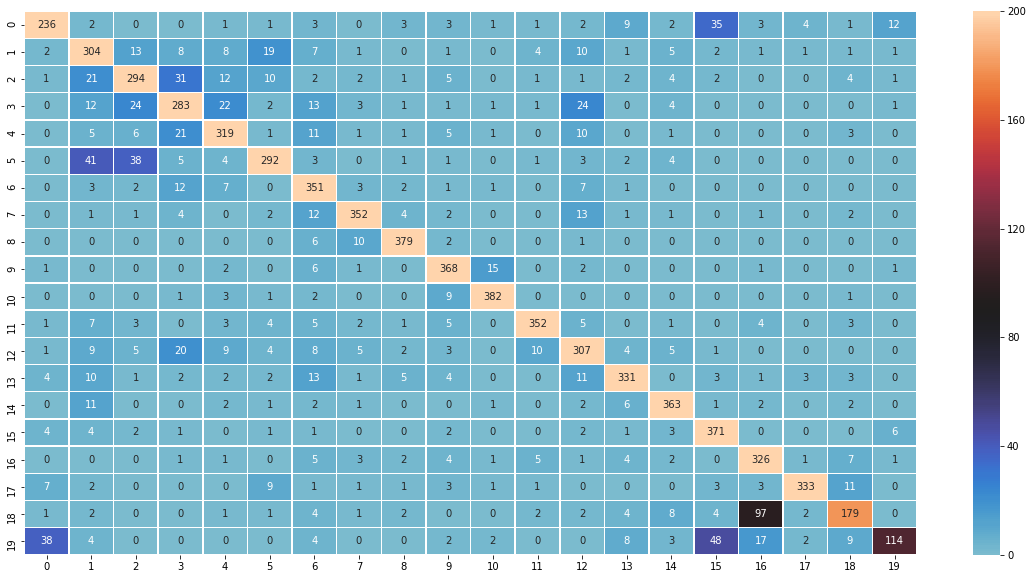

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

cf = confusion_matrix(y_true=test.target, y_pred=predicted)
import seaborn as sns
plt.figure(figsize=(20,10))
ax = sns.heatmap(cf, annot=True, fmt="d",linewidths=.5, center = 90, vmax = 200)


Remove stop words and test accuracy